<a href="https://colab.research.google.com/github/Requenamar3/datawrangling/blob/main/WranglingTemplate_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Structural Analysis (import libs, data, investigate the structure)
2. Quality Analysis (dupes, nulls, missing values, bad data, outliers)
3. Content Investigation (distribution, patterns, feature relationships)
4. EDA: Univariate, Bivariate, Multivariate
5. Feature Selection w/ Data (missing values,unused cols, uncorrelated and low variance features, multicollinearity)
6. Feature Selection with Models (coeffients, p-value, VIF)
7. Feature Importance (RFE, PCA, LDA)
8. Normalize / Encode (OHE, Normalize/Standardize, Pipelines)
9. Data Leakage, Resampling, K-Fold Cross Validation


[Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html#api)

[Scikit-Learn Documentation](https://scikit-learn.org/stable/supervised_learning.html)

[NumPy Documentation](https://numpy.org/doc/)

[Python Tutor](https://pythontutor.com/visualize.html#mode=edit)

In [ ]:
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
#Write out the versions of all packages to requirements.txt
!pip freeze >> requirements.txt

# Remove the restriction on Jupyter that limits the columns displayed (the ... in the middle)
pd.set_option('max_columns',None)
# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#

# Pretty Display of variables.  for instance, you can call df.head() and df.tail() in the same cell and BOTH display w/o print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# List of ALL Magic Commands.  To run a magic command %var  --- i.e.:  %env
%lsmagic
# %env  -- list environment variables
# %%time  -- gives you information about how long a cel took to run
# %%timeit -- runs a cell 100,000 times and then gives you the average time the cell will take to run (can be LONG)
# %pdb -- python debugger

# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print(np.__version__)
print(sklearn.__version__)

1.21.6
1.0.2


# Structural Analysis

In [ ]:
# Standard Imports
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
%matplotlib inline

In [ ]:
# Import Data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import certifi
from sklearn.datasets import fetch_openml

# Download the dataset from openml
dataset = fetch_openml(data_id=42803, as_frame=True)
# Extract feature matrix X and show 5 random samples
df_X = dataset["frame"]
df_X.sample(5)

# df = pd.read_csv('')

Accident_Index  Vehicle_Reference_df_res  Vehicle_Type  \
60991   201504EF15209                       1.0           3.0   
176034  2015300012338                       1.0           9.0   
337762  2015621501598                       1.0           9.0   
187445  201531D183015                       1.0           9.0   
230020  201542I022201                       3.0           9.0   

        Towing_and_Articulation  Vehicle_Manoeuvre  \
60991                       0.0               13.0   
176034                      0.0                5.0   
337762                      0.0                4.0   
187445                      0.0               18.0   
230020                      0.0                3.0   

        Vehicle_Location-Restricted_Lane  Junction_Location  \
60991                                0.0                8.0   
176034                               0.0                8.0   
337762                               0.0                1.0   
187445                               0.0                0.0   
230020                               0.0                0.0   

        Skidding_and_Overturning  Hit_Object_in_Carriageway  \
60991                        1.0                        0.0   
176034                       0.0                        0.0   
337762                       0.0                        0.0   
187445                       0.0                        0.0   
230020                       0.0                        0.0   

        Vehicle_Leaving_Carriageway  Hit_Object_off_Carriageway  \
60991                           0.0                         0.0   
176034                          0.0                         0.0   
337762                          0.0                         0.0   
187445                          0.0                         0.0   
230020                          0.0                         0.0   

        1st_Point_of_Impact  Was_Vehicle_Left_Hand_Drive?  \
60991                   1.0                           1.0   
176034                  3.0                           1.0   
337762                  1.0                           1.0   
187445                  1.0                           1.0   
230020                  2.0                           1.0   

        Journey_Purpose_of_Driver Sex_of_Driver  Age_of_Driver  \
60991                         6.0           1.0           20.0   
176034                        6.0           1.0           34.0   
337762                        6.0           1.0           44.0   
187445                        2.0           2.0           40.0   
230020                        6.0           1.0           29.0   

        Age_Band_of_Driver  Engine_Capacity_(CC)  Propulsion_Code  \
60991                  4.0                 124.0              1.0   
176034                 6.0                   NaN              NaN   
337762                 7.0                   NaN              NaN   
187445                 7.0                1598.0              2.0   
230020                 6.0                   NaN              NaN   

        Age_of_Vehicle  Driver_Home_Area_Type  Location_Easting_OSGR  \
60991              4.0                    1.0               383230.0   
176034             NaN                    NaN               441650.0   
337762             NaN                    1.0               262819.0   
187445             2.0                    1.0               455681.0   
230020             NaN                    1.0               570058.0   

        Location_Northing_OSGR  Longitude   Latitude  Police_Force  \
60991                 432690.0  -2.256033  53.790252           4.0   
176034                334350.0  -1.382199  52.904978          30.0   
337762                193315.0  -3.983028  51.621888          62.0   
187445                354219.0  -1.170194  53.082298          31.0   
230020                188099.0   0.452209  51.566123          42.0   

        Accident_Severity  Number_of_Vehicles  Number_of_Casualties  \
60991                 3.0 

In [ ]:
df_X.shape

(363243, 67)

In [ ]:
# Count how many times each data type is present in the dataset
pd.value_counts(df_X.dtypes)

float64    61
object      6
dtype: int64

In [ ]:
# Display categorical features
df_X.select_dtypes(exclude="number").head()

Accident_Index Sex_of_Driver        Date   Time Local_Authority_(Highway)  \
0  201501BS70001           1.0  12/01/2015  18:45                 E09000020   
1  201501BS70002           1.0  12/01/2015  07:50                 E09000020   
2  201501BS70004           1.0  12/01/2015  18:08                 E09000020   
3  201501BS70005           1.0  13/01/2015  07:40                 E09000020   
4  201501BS70008           1.0  09/01/2015  07:30                 E09000020   

  LSOA_of_Accident_Location  
0                 E01002825  
1                 E01002820  
2                 E01002833  
3                 E01002874  
4                 E01002814

In [ ]:
# Change data type of 'sex_of_Driver'
df_X['Sex_of_Driver'] = df_X['Sex_of_Driver'].astype('float')

<Figure size 1080x288 with 0 Axes>

[Text(0, 0, 'Urban_or_Rural_Area'),
 Text(0, 0, 'Sex_of_Casualty'),
 Text(0, 0, 'Was_Vehicle_Left_Hand_Drive?'),
 Text(0, 0, 'Did_Police_Officer_Attend_Scene_of_Accident'),
 Text(0, 0, 'Casualty_Class'),
 Text(0, 0, 'Sex_of_Driver'),
 Text(0, 0, 'Accident_Severity'),
 Text(0, 0, 'Casualty_Severity'),
 Text(0, 0, 'Car_Passenger'),
 Text(0, 0, 'Casualty_Home_Area_Type'),
 Text(0, 0, 'Pedestrian_Road_Maintenance_Worker'),
 Text(0, 0, 'Pedestrian_Crossing-Human_Control'),
 Text(0, 0, 'Driver_Home_Area_Type'),
 Text(0, 0, 'Junction_Control'),
 Text(0, 0, 'Road_Surface_Conditions'),
 Text(0, 0, '1st_Point_of_Impact'),
 Text(0, 0, 'Bus_or_Coach_Passenger'),
 Text(0, 0, 'Light_Conditions'),
 Text(0, 0, '2nd_Road_Class'),
 Text(0, 0, 'Pedestrian_Crossing-Physical_Facilities'),
 Text(0, 0, '1st_Road_Class'),
 Text(0, 0, 'Carriageway_Hazards'),
 Text(0, 0, 'Road_Type'),
 Text(0, 0, 'Journey_Purpose_of_Driver'),
 Text(0, 0, 'Skidding_and_Overturning'),
 Text(0, 0, 'Towing_and_Articulation'),
 Text

Text(0.5, 1.0, 'Unique values per frequency')

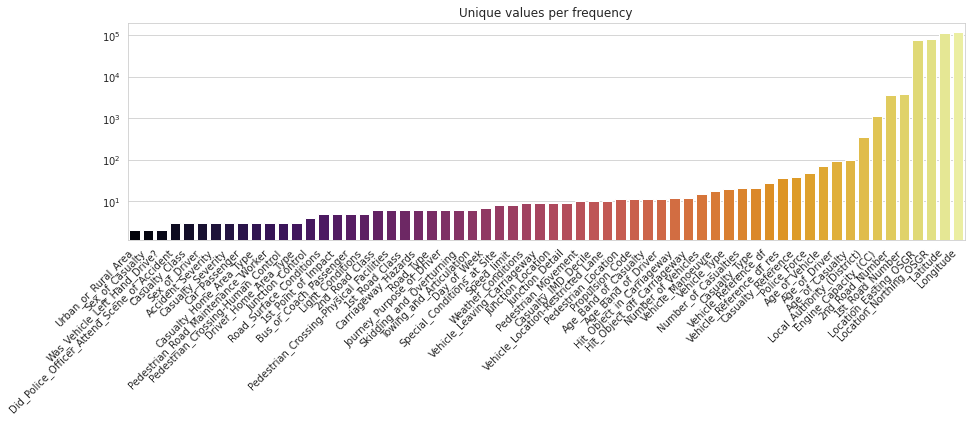

In [ ]:
# Evaluation of Numeric Features
# 2 unique values: binary
# 3 to ~ 10 unique values: ordinal (cat)
# 10+ unique values continuous
 # For each numerical feature compute number of unique entries
unique_values = df_X.select_dtypes(include='number').nunique().sort_values()
plt.figure(figsize=(15, 4))
sns.set_style('whitegrid')

g = sns.barplot(x=unique_values.index, y=unique_values, palette='inferno')
g.set_yscale("log")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Unique values per frequency')
plt.show()

# Quality Analysis

In [ ]:
%time
# Check number of duplicates while ignoring the index feature
n_duplicates = df_X.drop(labels=['Accident_Index'], axis=1).duplicated().sum()

print(f"You seem to have {n_duplicates} duplicates in your database.")

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.2 µs
You seem to have 22 duplicates in your database.


In [ ]:
#  Extract column names of all features, except 'Accident_Index'
# you may want to remove the target as well
columns_to_consider = df_X.drop(labels=['Accident_Index'], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df_X.drop_duplicates(subset=columns_to_consider, inplace=True)
df_X.shape

(363221, 67)

<Figure size 1080x576 with 0 Axes>

Text(0.5, 50.09375, 'Column Number')

Text(114.0, 0.5, 'Sample Number')

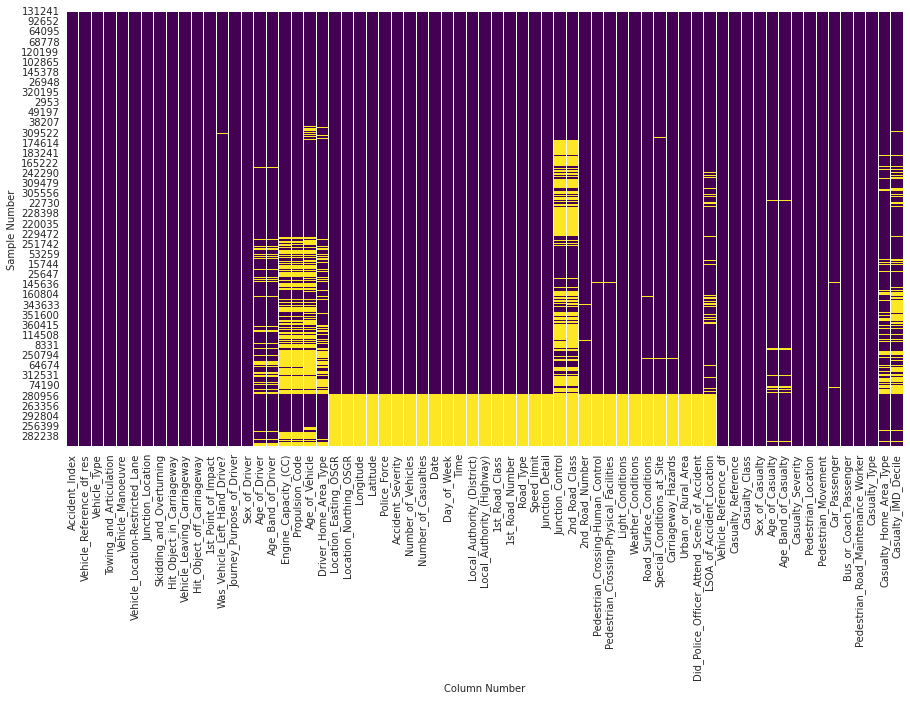

In [ ]:
# Missing Values (per sample/row)
# Take a look at the BIG HOLES in the dataset
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

# g = sns.heatmap(df_X.isnull(), cbar=False, cmap='viridis')
g = sns.heatmap(df_X.loc[df_X.isnull().sum(1).sort_values(ascending=True).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')
# Remember to view this from the ROW perspective.

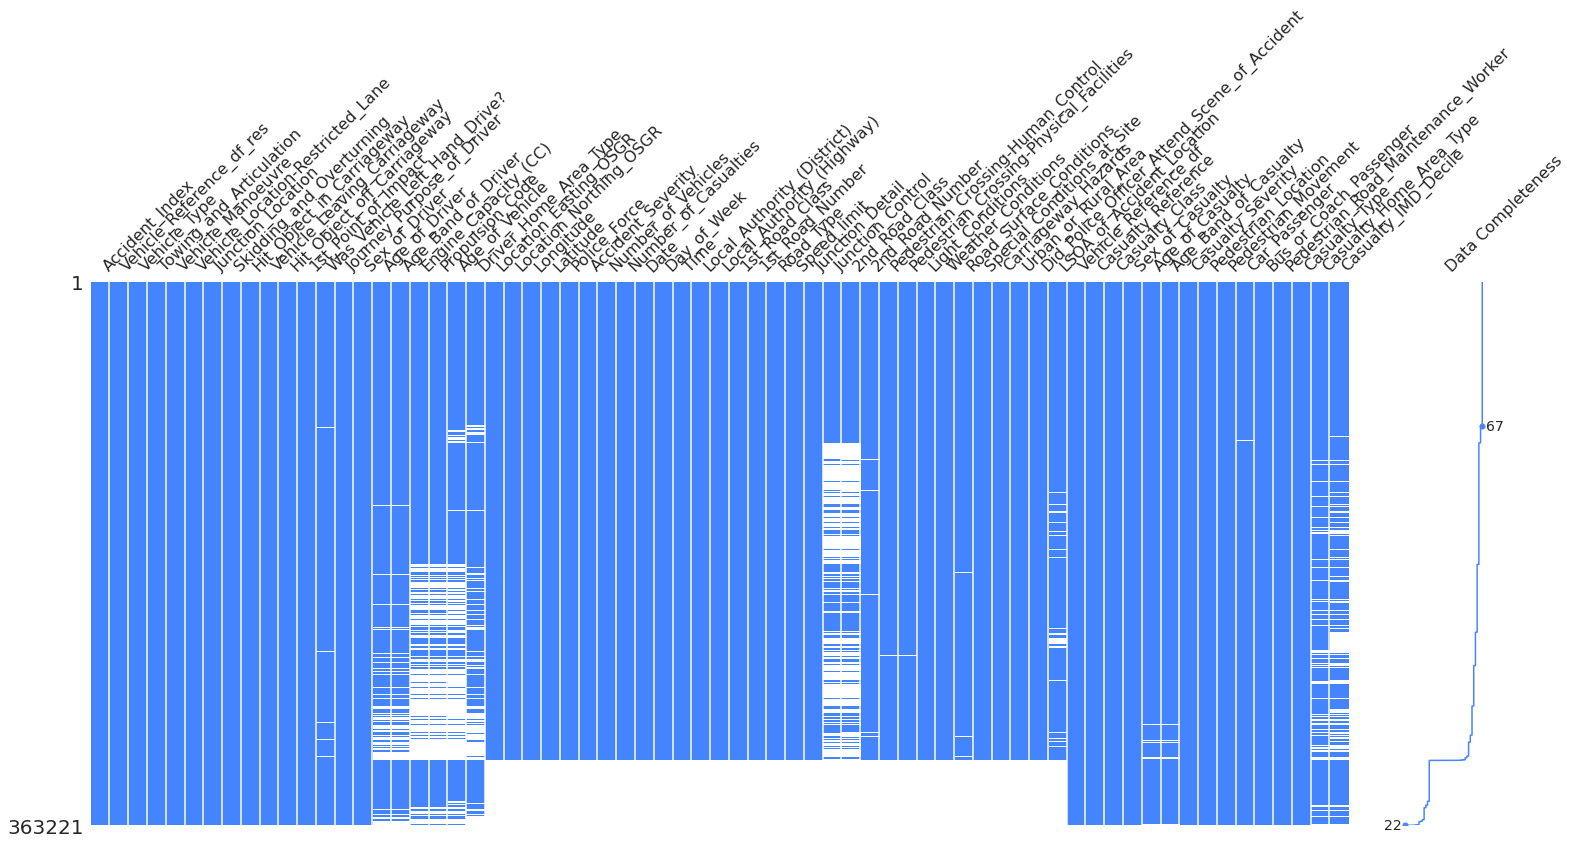

In [ ]:
# This figure shows on the y-axis each of the 360'000 individual samples, and on the x-axis if any of the 67 features contains a missing value. While this is already a useful plot, an even better approach is to use the missingno library, to get a plot like this one:
import missingno as msno
msno.matrix(df_X, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

In [ ]:
# Drop rows that are 20% or more empty (you set the threshold)
df_X = df_X.dropna(thresh=df_X.shape[1] * 0.80, axis=0).reset_index(drop=True)
df_X.shape

(319790, 67)

<Figure size 1080x576 with 0 Axes>

Text(0.5, 50.09375, 'Column Number')

Text(114.0, 0.5, 'Sample Number')

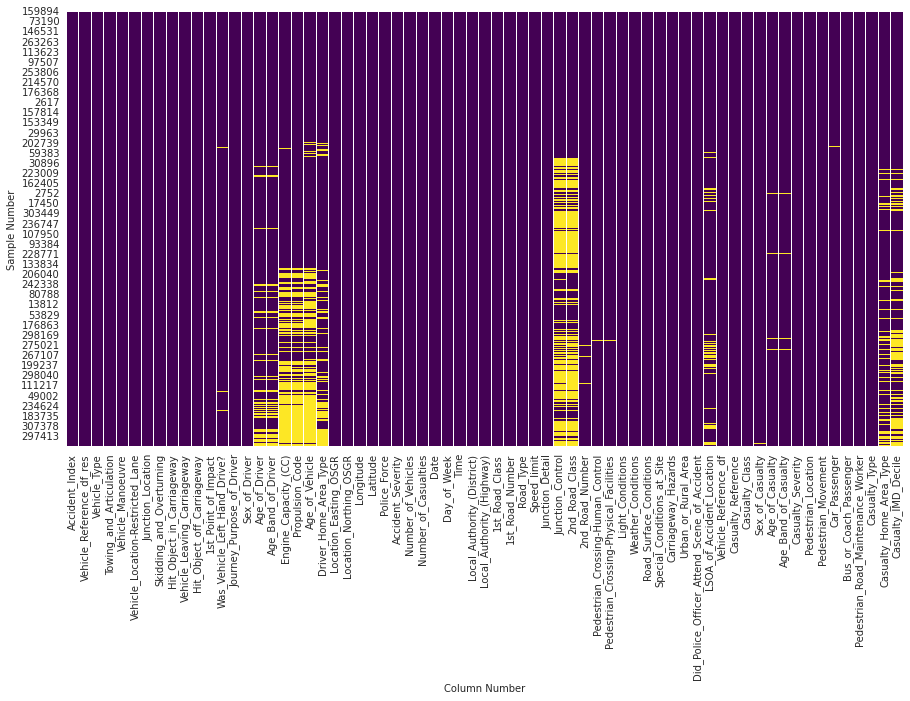

In [ ]:
# Take a look at the BIG HOLES in the dataset
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

# g = sns.heatmap(df_X.isnull(), cbar=False, cmap='viridis')
g = sns.heatmap(df_X.loc[df_X.isnull().sum(1).sort_values(ascending=True).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')
# Remember to view this from the ROW perspective.

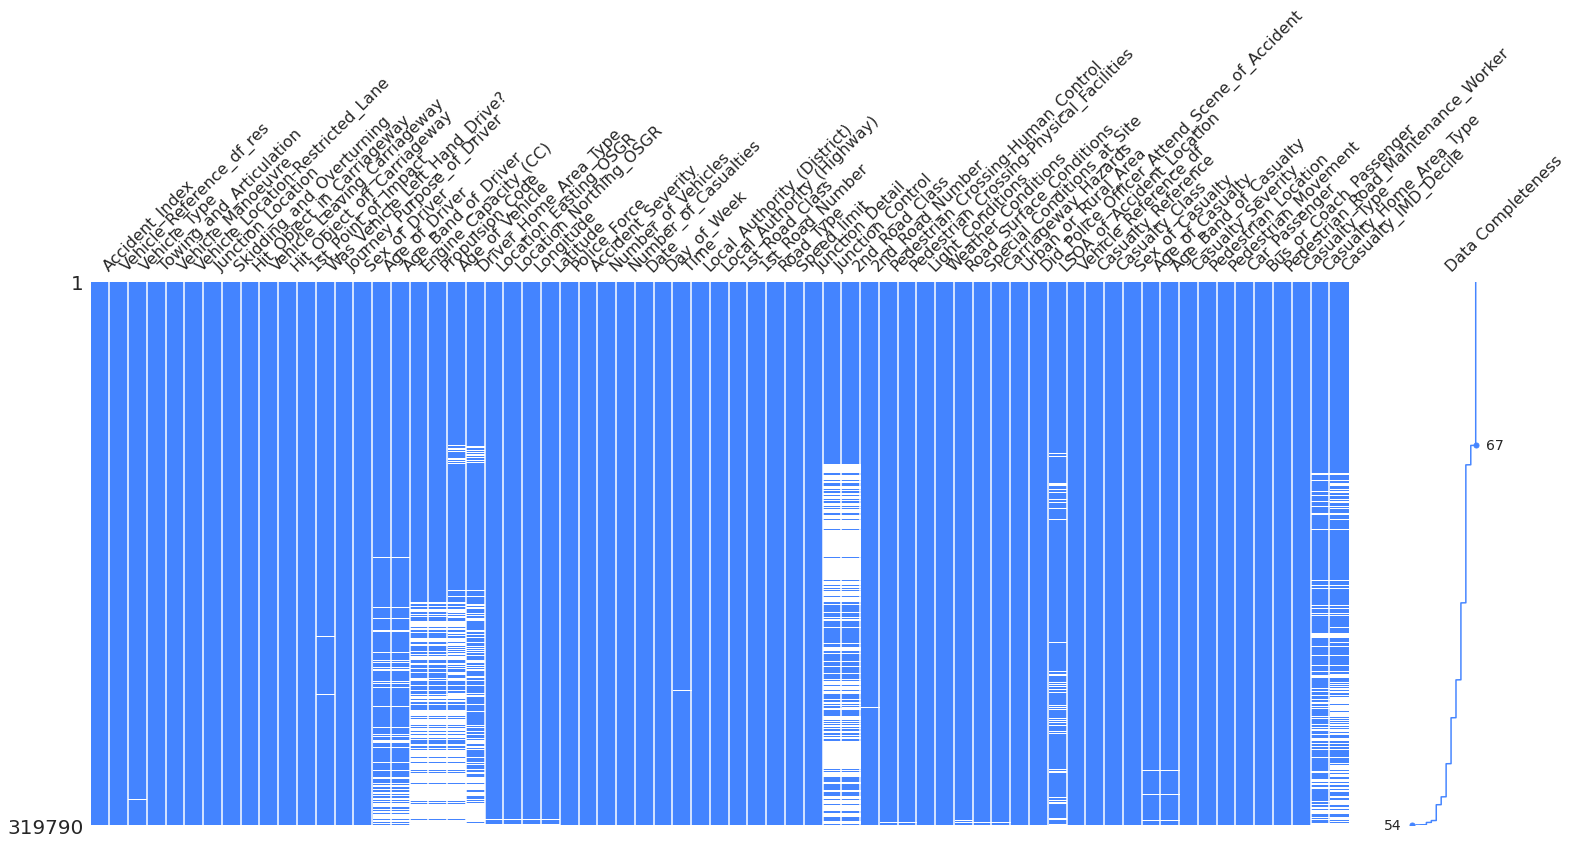

In [ ]:
msno.matrix(df_X, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

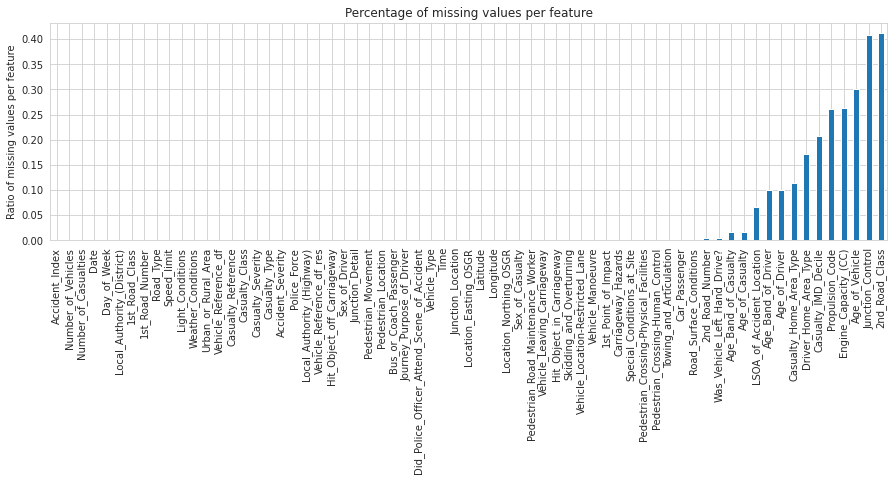

In [ ]:
# Per Feature / column
df_X.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [ ]:
df_X = df_X.dropna(thresh=df_X.shape[0] * 0.85, axis=1)
df_X.shape

(319790, 60)

CPU times: user 1.96 s, sys: 256 ms, total: 2.22 s
Wall time: 2.12 s


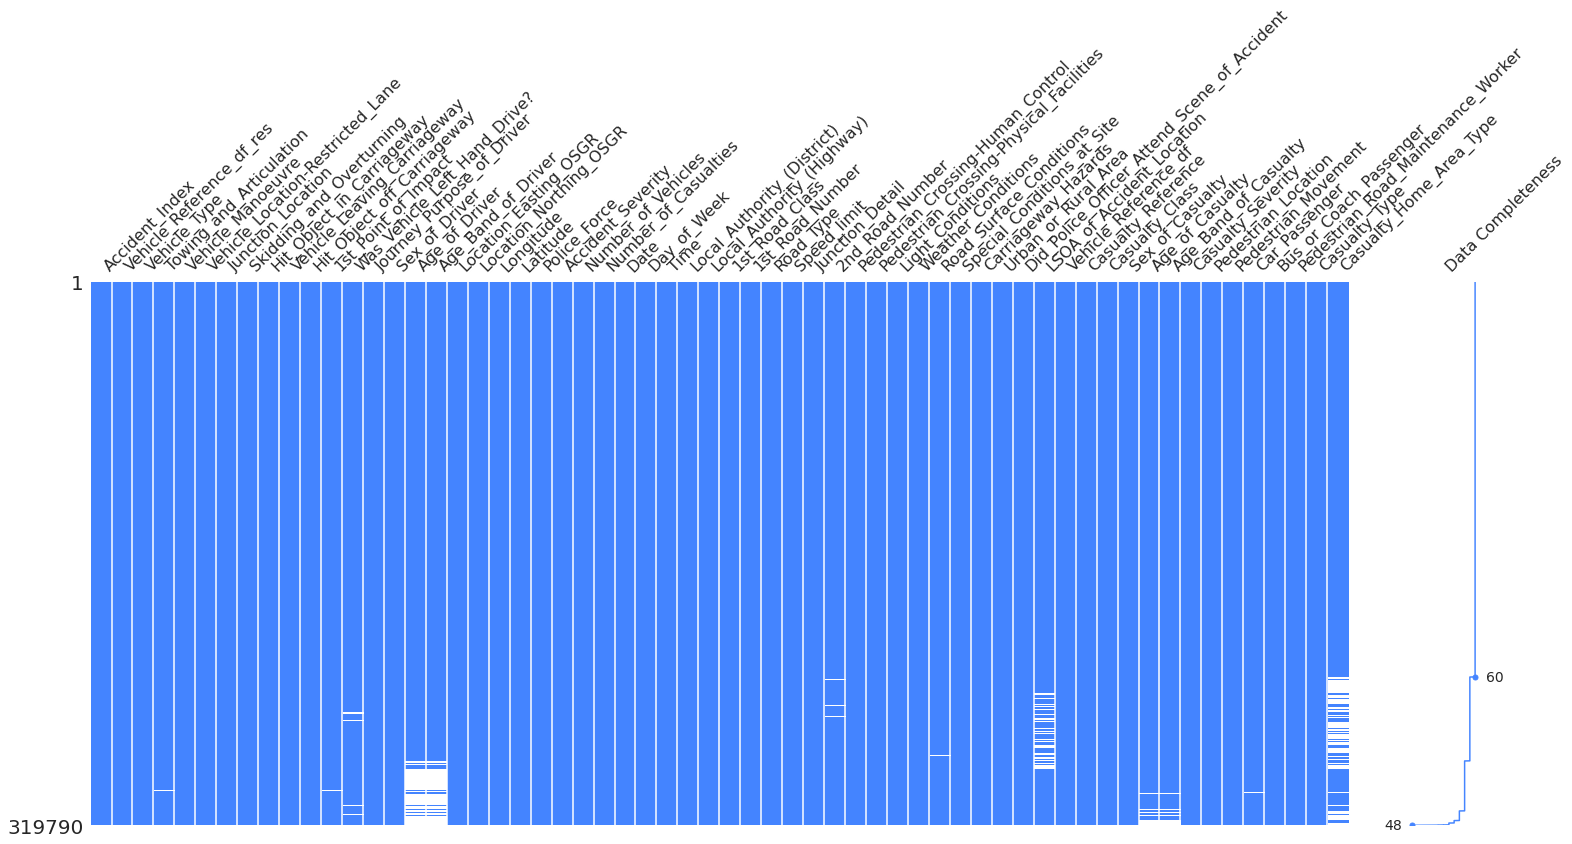

In [ ]:
%%time
msno.matrix(df_X, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

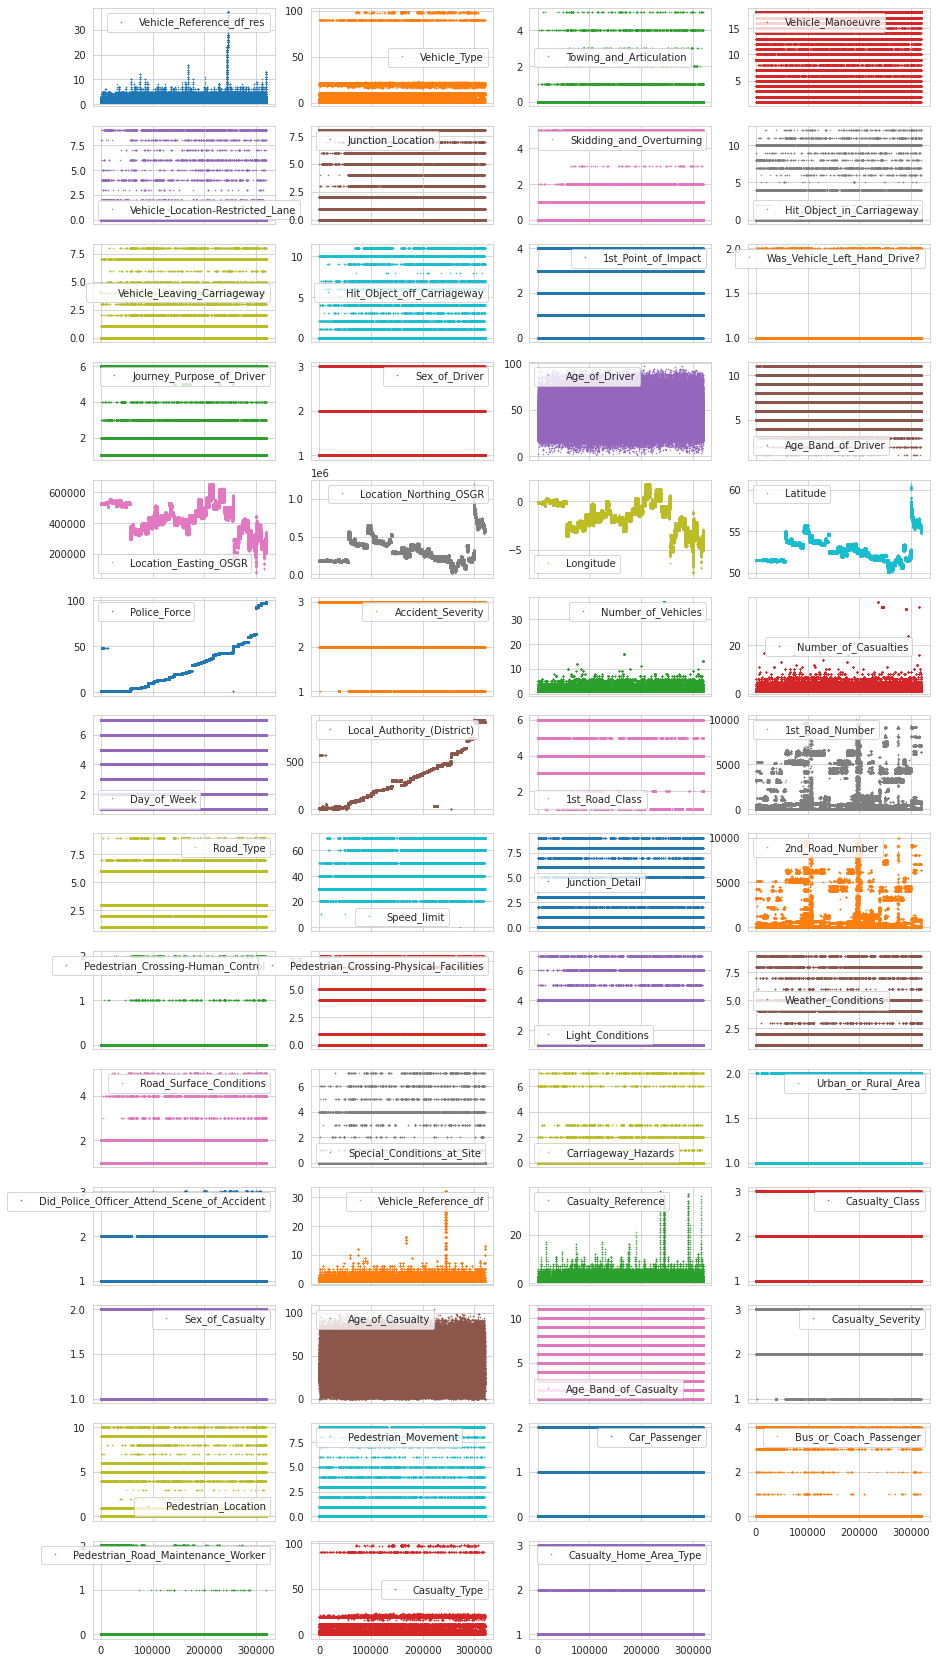

In [ ]:
# Plot all numeric features:
df_X.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

In [ ]:
# Investigate Categorical Features
# Extract descriptive properties of categorical features
df_X.describe(exclude=["number", "datetime"])

Accident_Index        Date    Time Local_Authority_(Highway)  \
count          319790      319790  319746                    319790   
unique         123645         365    1439                       204   
top     201543P296025  14/02/2015   17:30                 E10000017   
freq             1332        2144    2969                      8457   

       LSOA_of_Accident_Location  
count                     298693  
unique                     25977  
top                    E01028497  
freq                        1456

CPU times: user 1.05 s, sys: 89.1 ms, total: 1.14 s
Wall time: 1.05 s


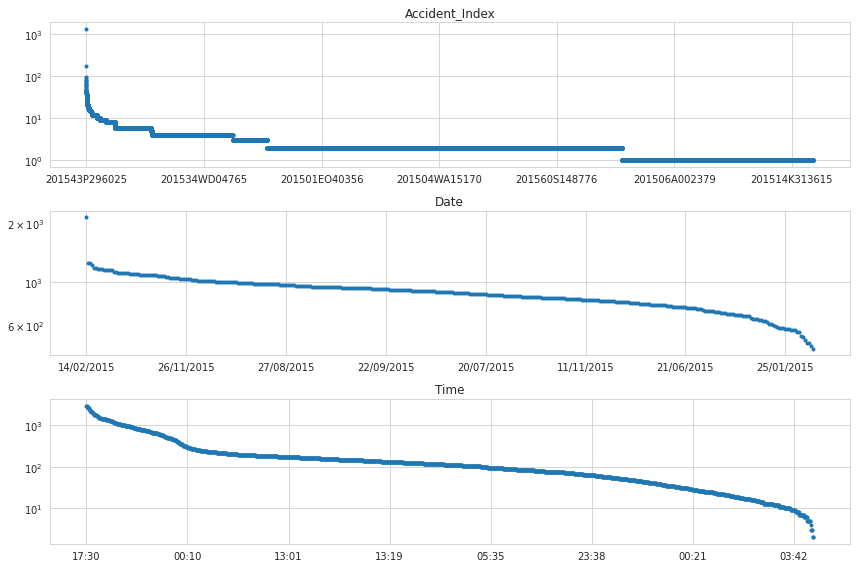

In [ ]:
%%time
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 8))

# Identify non-numerical features
df_non_numerical = df_X.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)

plt.tight_layout();

In [ ]:
# Collect entry values of the 10 most frequent accidents
accident_ids =df_non_numerical["Accident_Index"].value_counts().head(10).index
# Removes accidents from the 'accident_ids' list
df_X = df_X[~df_X["Accident_Index"].isin(accident_ids)]
df_X.shape

(317665, 60)

(317665, 60)

(317665, 60)

# Content Analysis

CPU times: user 4.78 s, sys: 149 ms, total: 4.93 s
Wall time: 4.81 s


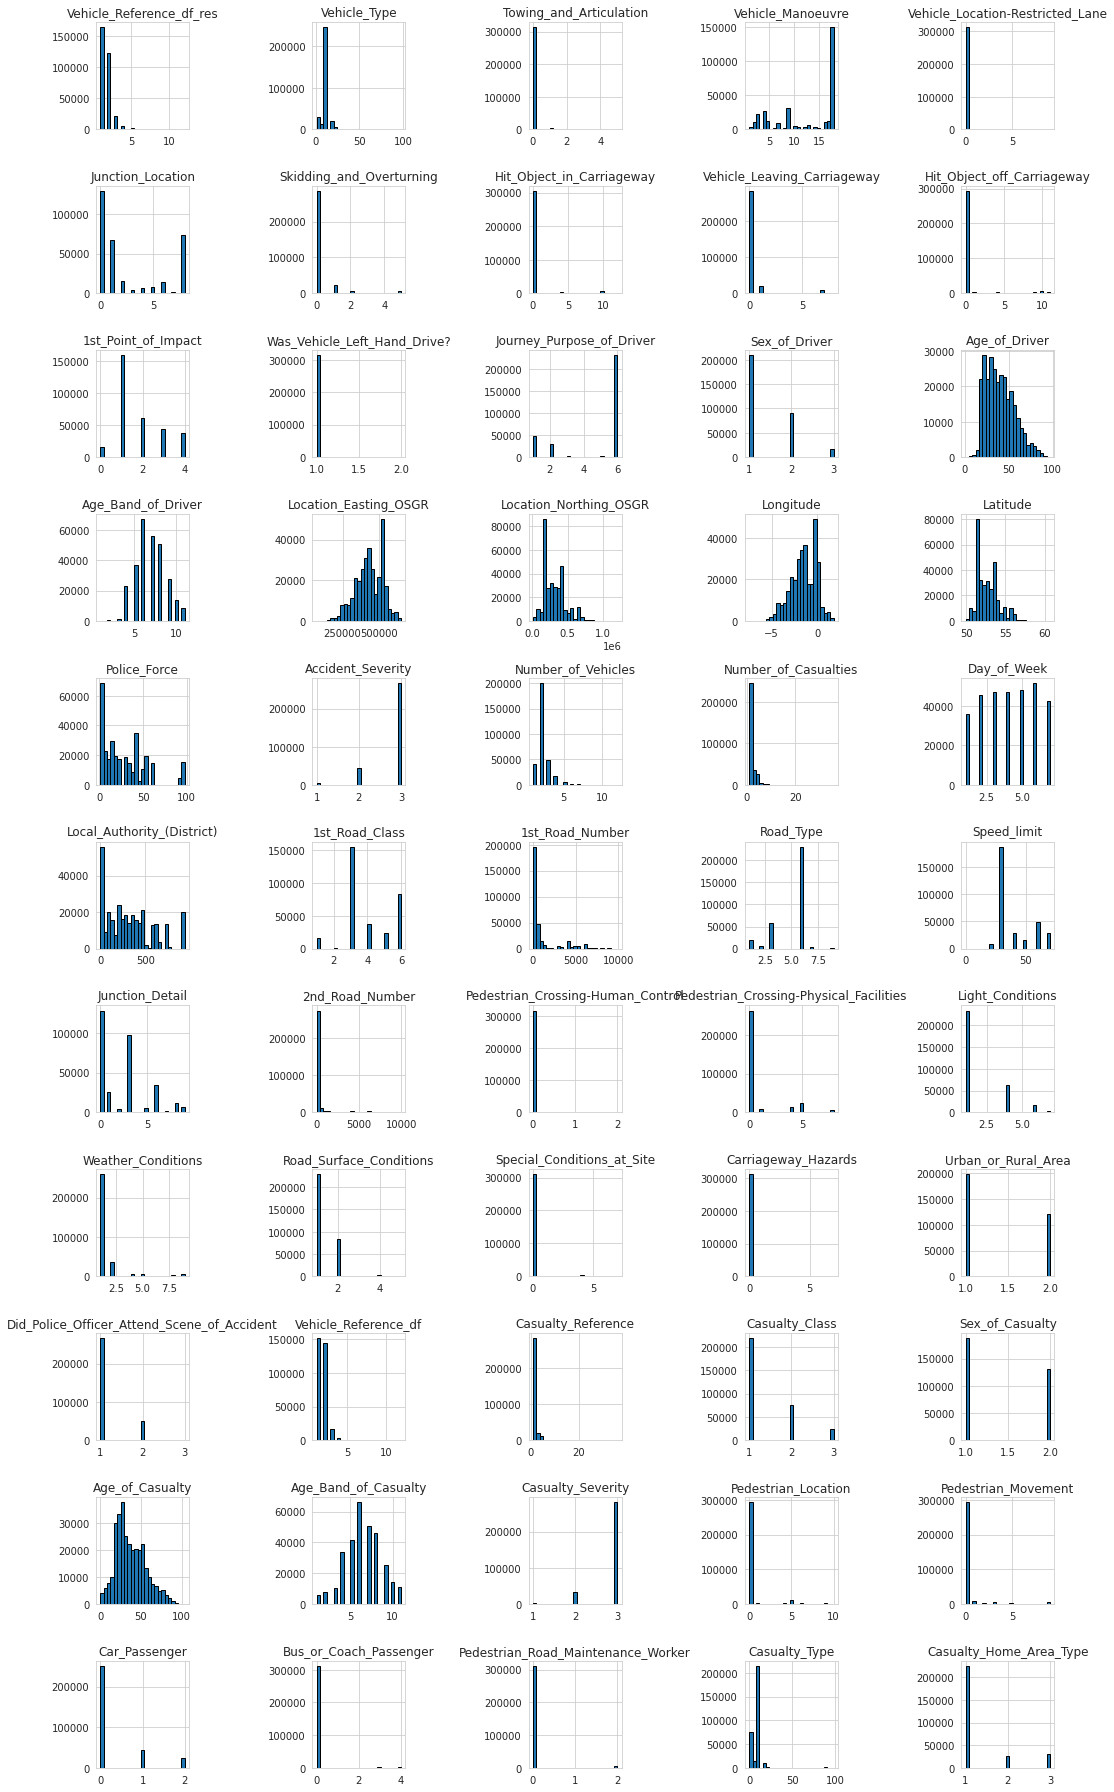

In [ ]:
# Feature Distribution
%%time
# Plots the histogram for each numerical feature in a separate subplot
df_X.hist(bins=25, figsize=(15, 25), layout=(-1, 5),
edgecolor="black")
plt.tight_layout();

Pedestrian_Crossing-Human_Control    0.995259
Was_Vehicle_Left_Hand_Drive?         0.990137
Carriageway_Hazards                  0.983646
Towing_and_Articulation              0.983221
Vehicle_Location-Restricted_Lane     0.982088
dtype: float64

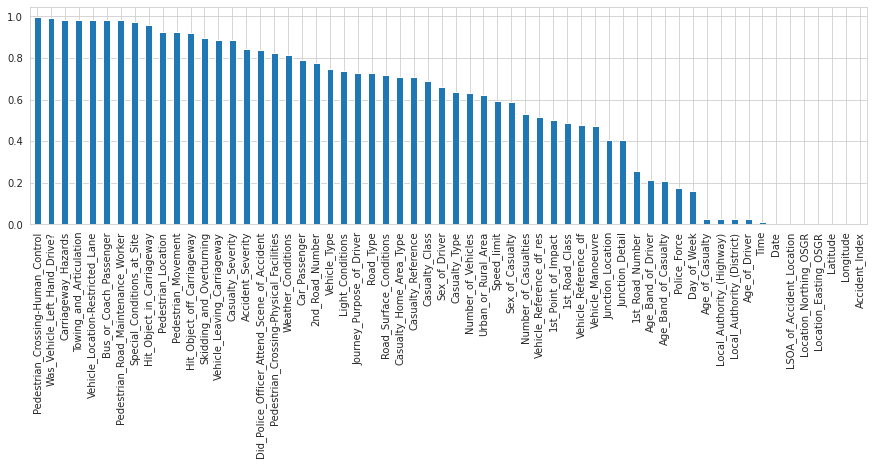

In [ ]:
# Collects for each feature the most frequent entry
most_frequent_entry = df_X.mode()
# Checks for each entry if it contains the most frequent entry
df_freq = df_X.eq(most_frequent_entry.values, axis=1)
# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)
# Show the 5 top features with the highest ratio of singular value content
display(df_freq.head())
# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4));

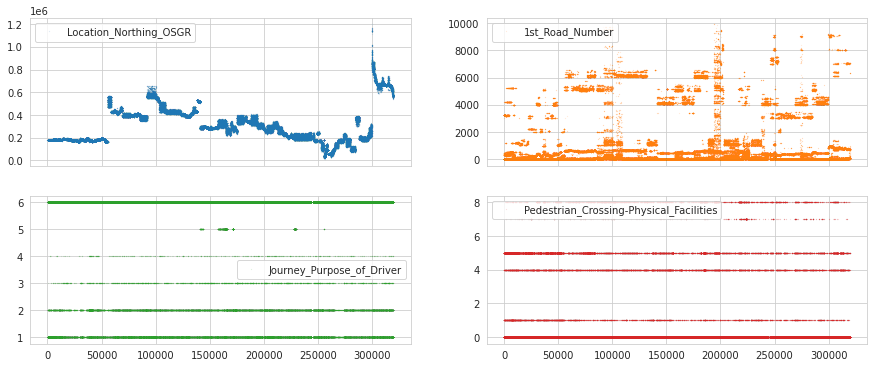

In [ ]:
# Feature Patterns
df_X[["Location_Northing_OSGR", "1st_Road_Number","Journey_Purpose_of_Driver", "Pedestrian_Crossing-Physical_Facilities"]].plot(

lw=0, marker=".", subplots=True, layout=(-1, 2), markersize=0.1,
figsize=(15, 6));

In [ ]:
# Creates mask to identify numerical features with more or less than 25 unique features
cols_continuous = df_X.select_dtypes(include="number").nunique() >= 25

CPU times: user 30.1 s, sys: 321 ms, total: 30.4 s
Wall time: 30.2 s


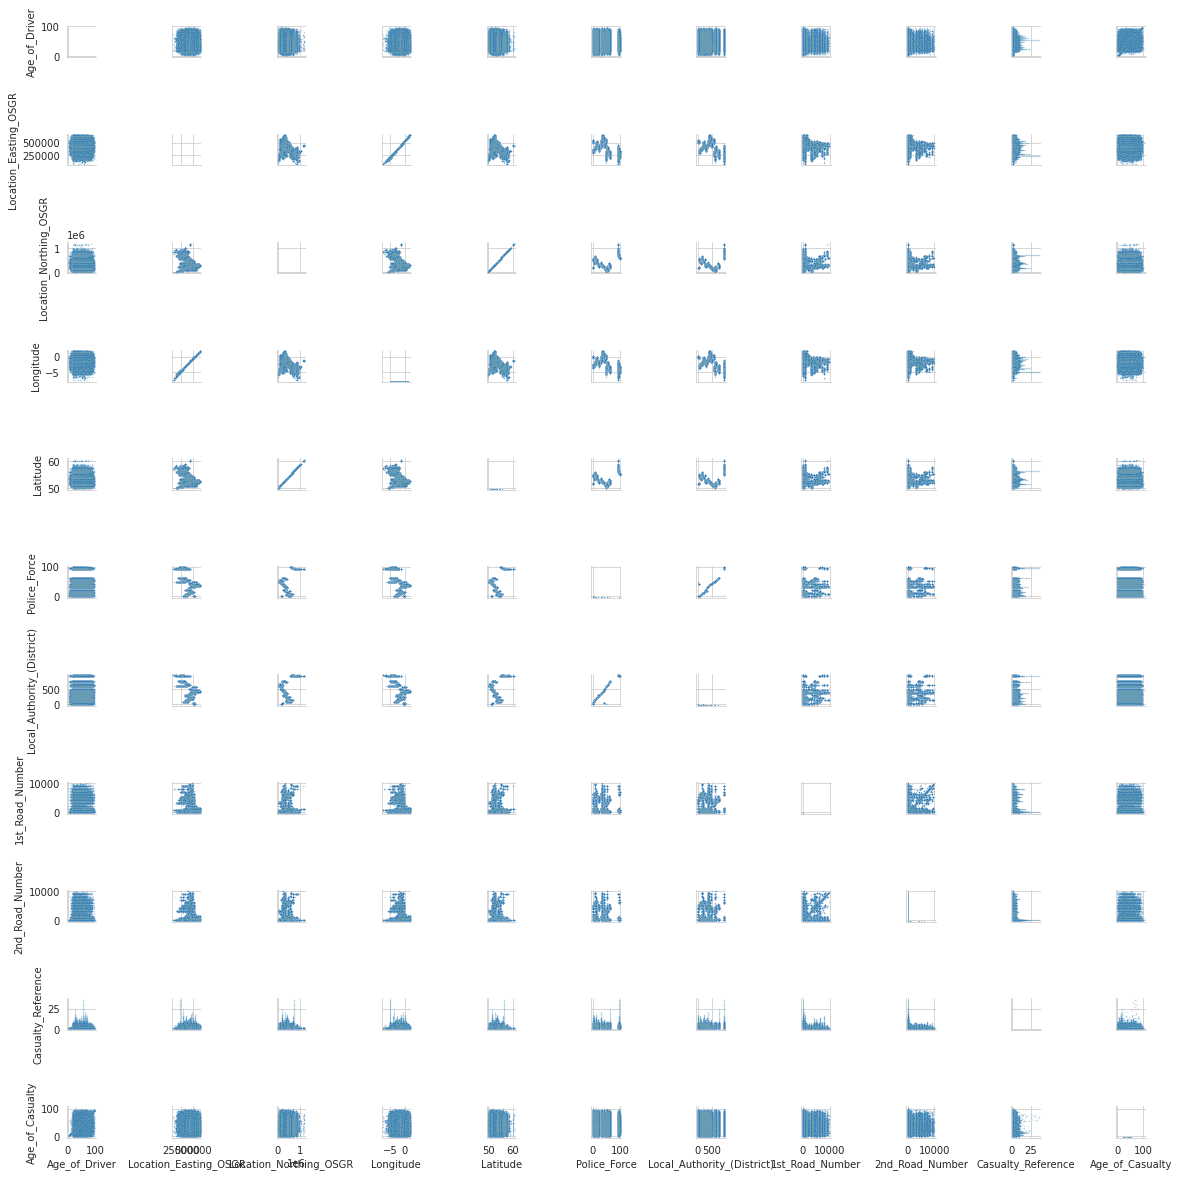

In [ ]:
# Analyze Continuous Features
%%time
# Create a new dataframe which only contains the continuous features
df_continuous = df_X[cols_continuous[cols_continuous].index]
df_continuous.shape
sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha":0.2});

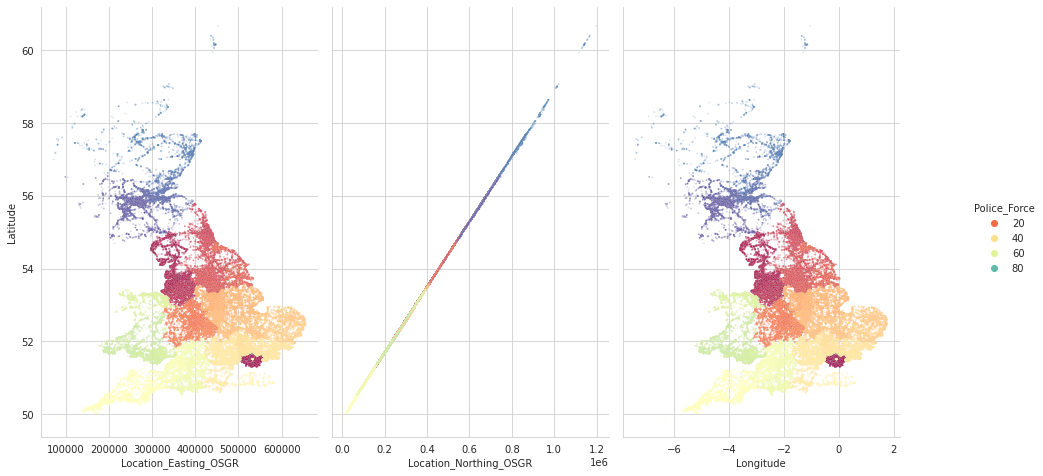

In [ ]:
g = sns.pairplot(
df_X, plot_kws={'s': 3, 'alpha': 0.2}, hue='Police_Force',
palette='Spectral',
x_vars=['Location_Easting_OSGR', 'Location_Northing_OSGR',
'Longitude'],
y_vars='Latitude');
g.fig.set_size_inches(15,8)

In [ ]:
# Discrete and Ordinal Features
# Create a new dataframe which doesn't contain the numerical continuous features
df_discrete = df_X[cols_continuous[~cols_continuous].index]
df_discrete.shape

(317665, 44)

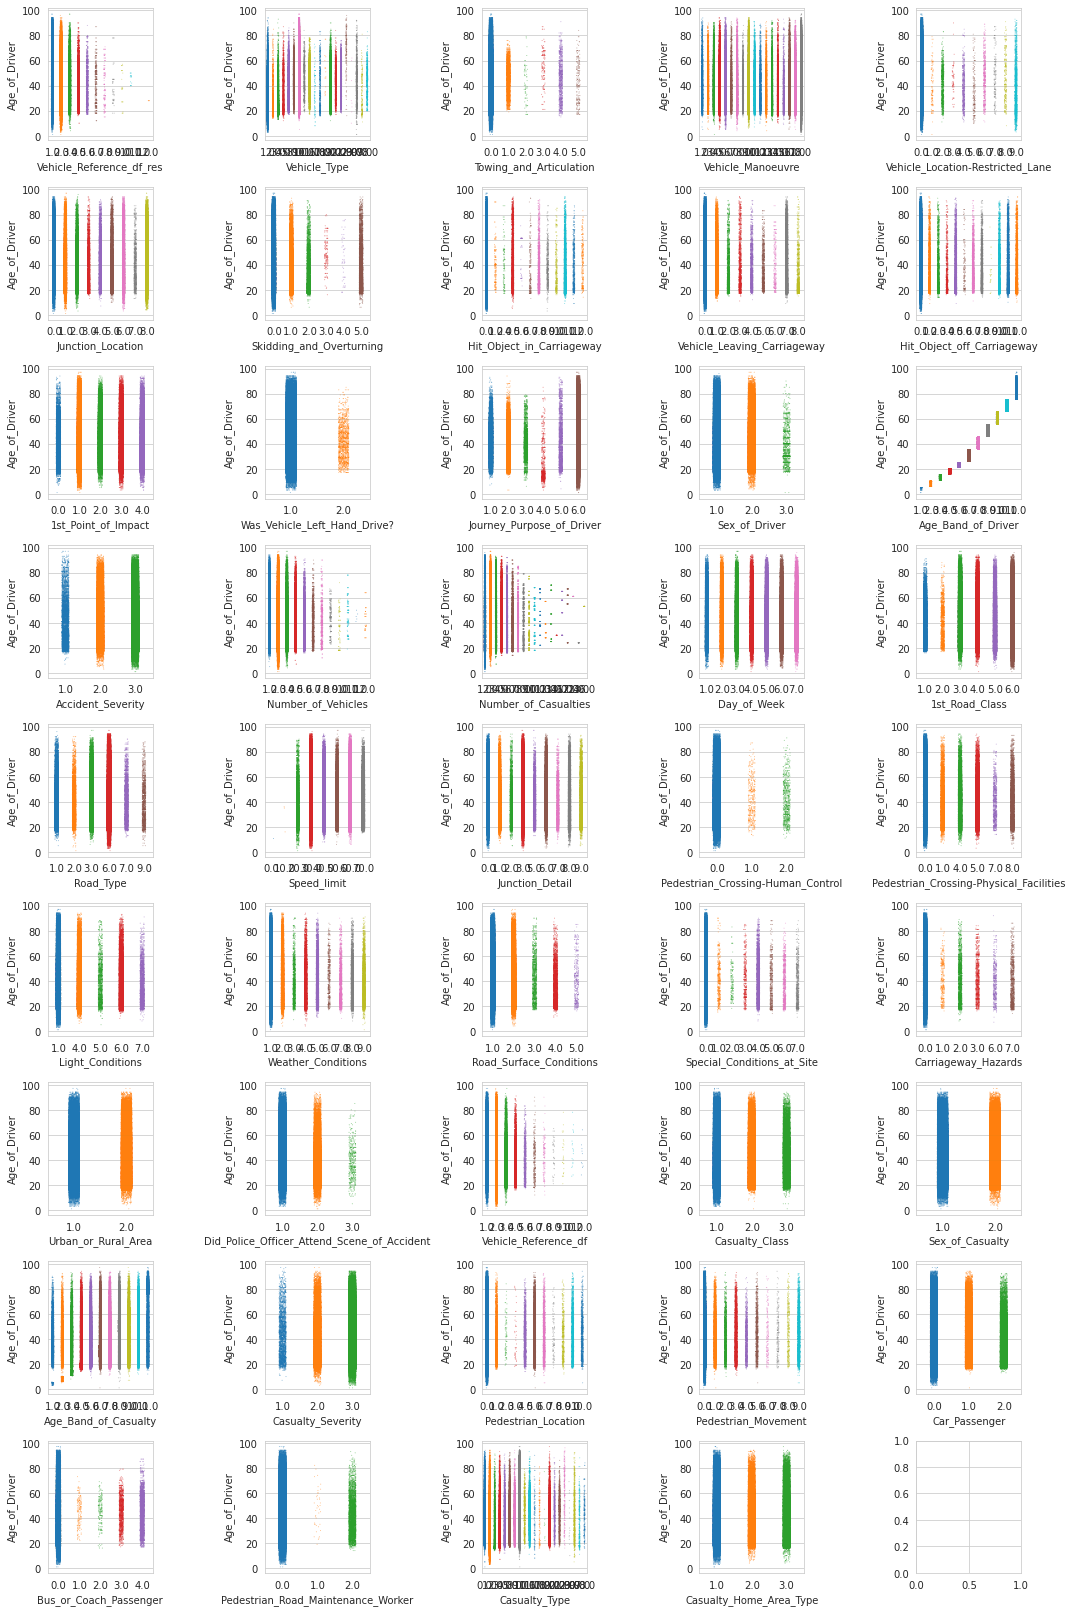

In [ ]:
# Establish number of columns and rows needed to plot all features
n_cols = 5
n_elements = len(df_discrete.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")
# Specify y_value to spread data (ideally a continuous feature)
y_value = df_X["Age_of_Driver"]
# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15,n_rows * 2.5))
# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_discrete.columns, axes.ravel()):
  sns.stripplot(data=df_X, x=col, y=y_value, ax=ax, palette="tab10",size=1, alpha=0.5)
  plt.tight_layout();

CPU times: user 2.21 s, sys: 163 ms, total: 2.37 s
Wall time: 2.26 s


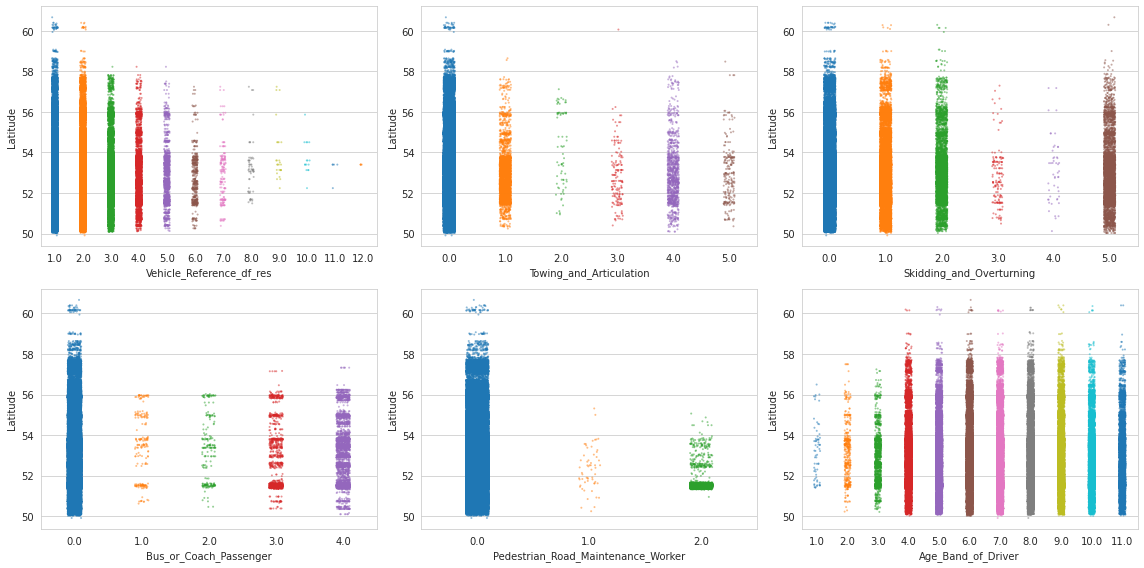

In [ ]:
%%time
# Specify features of interest
selected_features = ["Vehicle_Reference_df_res","Towing_and_Articulation","Skidding_and_Overturning","Bus_or_Coach_Passenger","Pedestrian_Road_Maintenance_Worker","Age_Band_of_Driver"]
# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))
# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
  sns.stripplot(data=df_X, x=col, y=df_X["Latitude"], ax=ax,palette="tab10", size=2, alpha=0.5)
  plt.tight_layout();

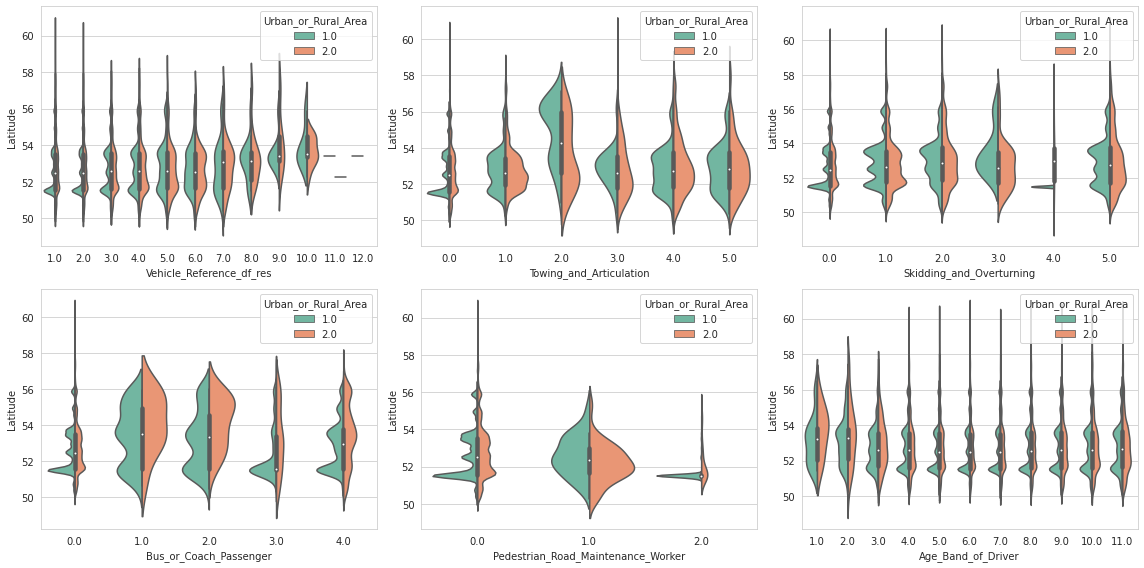

In [ ]:
# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))
# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
  sns.violinplot(data=df_X, x=col, y=df_X["Latitude"],palette="Set2",split=True,hue="Urban_or_Rural_Area", ax=ax)
  plt.tight_layout()

In [ ]:
# Feature Relationships
# Computes feature correlation
df_corr = df_X.corr(method="pearson")

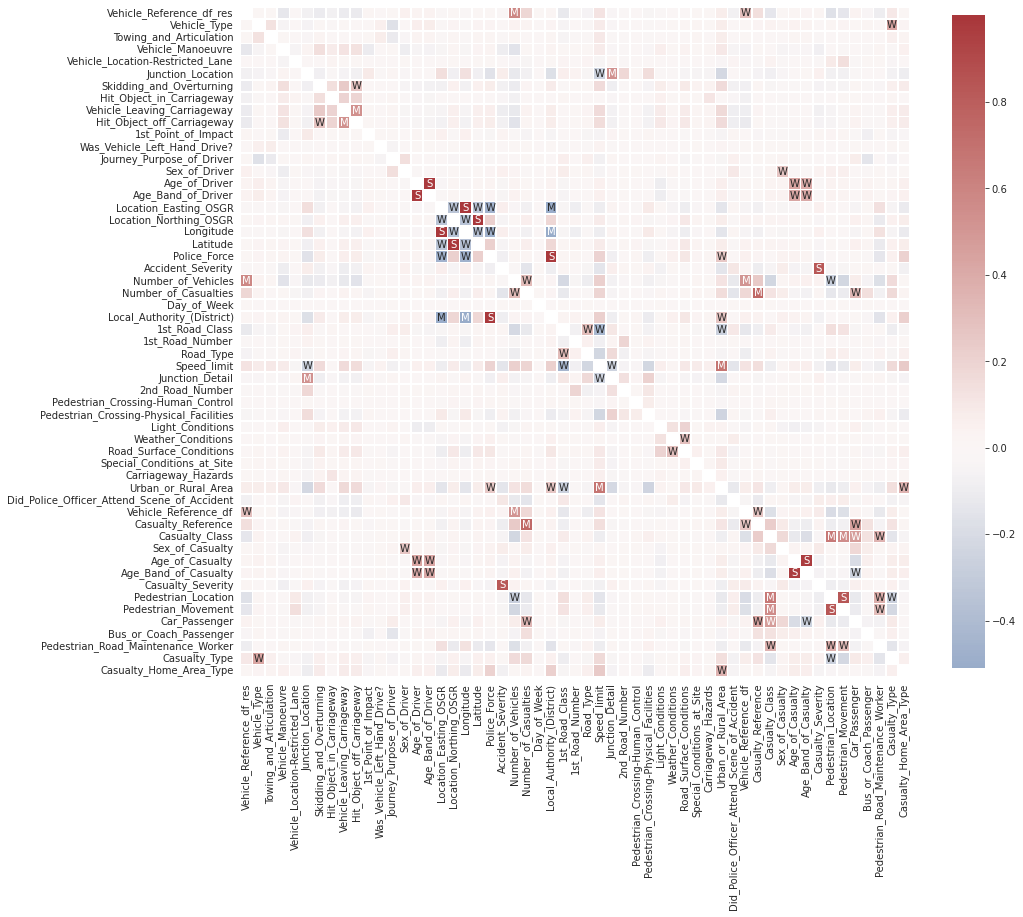

In [ ]:
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
np.where(np.abs(df_corr)>0.5, "M",
np.where(np.abs(df_corr)>0.25, "W", "")))
# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
center=0, annot=labels, fmt='', linewidths=.5,
cmap="vlag", cbar_kws={"shrink": 0.8});

In [ ]:
# Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape),k=-1).astype("bool")
# Stack all correlations, after applying the mask
df_corr_stacked =df_corr.where(lower_triangle_mask).stack().sort_values()
# Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)

Local_Authority_(District)  Longitude                -0.509343
                            Location_Easting_OSGR    -0.502919
Police_Force                Longitude                -0.471327
                            Location_Easting_OSGR    -0.461112
Speed_limit                 1st_Road_Class           -0.438931
                                                        ...   
Age_Band_of_Casualty        Age_of_Casualty           0.974397
Age_Band_of_Driver          Age_of_Driver             0.979019
Local_Authority_(District)  Police_Force              0.984819
Longitude                   Location_Easting_OSGR     0.999363
Latitude                    Location_Northing_OSGR    0.999974
Length: 1485, dtype: float64

In [ ]:
df_X.corrwith(df_X["Speed_limit"])

Vehicle_Reference_df_res                       0.125328
Vehicle_Type                                   0.084988
Towing_and_Articulation                        0.093955
Vehicle_Manoeuvre                              0.083893
Vehicle_Location-Restricted_Lane              -0.042151
Junction_Location                             -0.255276
Skidding_and_Overturning                       0.158914
Hit_Object_in_Carriageway                     -0.009527
Vehicle_Leaving_Carriageway                    0.157532
Hit_Object_off_Carriageway                     0.154671
1st_Point_of_Impact                           -0.045132
Was_Vehicle_Left_Hand_Drive?                   0.042181
Journey_Purpose_of_Driver                     -0.072046
Sex_of_Driver                                 -0.049271
Age_of_Driver                                  0.046731
Age_Band_of_Driver                             0.047315
Location_Easting_OSGR                         -0.093071
Location_Northing_OSGR                         0

In [ ]:
df_X.select_dtypes(exclude="number").head()

Accident_Index        Date   Time Local_Authority_(Highway)  \
0  201501BS70001  12/01/2015  18:45                 E09000020   
1  201501BS70002  12/01/2015  07:50                 E09000020   
2  201501BS70004  12/01/2015  18:08                 E09000020   
3  201501BS70005  13/01/2015  07:40                 E09000020   
4  201501BS70008  09/01/2015  07:30                 E09000020   

  LSOA_of_Accident_Location  
0                 E01002825  
1                 E01002820  
2                 E01002833  
3                 E01002874  
4                 E01002814

# Save a copy of your dataset at this point.

In [ ]:
df_X.to_csv('road_stuff2.csv')

# Split the data into cat/num.  Then OHE the cat data and normalize/standardize the num data

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/road_stuff.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.dtypes

Unnamed: 0                              int64
Accident_Index                         object
Vehicle_Reference_df_res              float64
Vehicle_Type                          float64
Towing_and_Articulation               float64
                                       ...   
Car_Passenger                         float64
Bus_or_Coach_Passenger                float64
Pedestrian_Road_Maintenance_Worker    float64
Casualty_Type                         float64
Casualty_Home_Area_Type               float64
Length: 61, dtype: object

In [ ]:
numerics = ['int16','int32','int64','float64']
catDF = df.select_dtypes(exclude=numerics) # encode them so that we can make them numeric
numDF = df.select_dtypes(include=numerics) # normalize/standaridize them so that we can scale them

In [ ]:
catDF.head()

Accident_Index        Date   Time Local_Authority_(Highway)  \
0  201501BS70001  12/01/2015  18:45                 E09000020   
1  201501BS70002  12/01/2015  07:50                 E09000020   
2  201501BS70004  12/01/2015  18:08                 E09000020   
3  201501BS70005  13/01/2015  07:40                 E09000020   
4  201501BS70008  09/01/2015  07:30                 E09000020   

  LSOA_of_Accident_Location  
0                 E01002825  
1                 E01002820  
2                 E01002833  
3                 E01002874  
4                 E01002814

In [ ]:
# catDF.drop(['Accident_Index'],axis=1)
catDF.drop(['Accident_Index','Date','Time','LSOA_of_Accident_Location'], axis=1)

Local_Authority_(Highway)
0                      E09000020
1                      E09000020
2                      E09000020
3                      E09000020
4                      E09000020
...                          ...
317660                 S12000006
317661                 S12000006
317662                 S12000006
317663                 S12000006
317664                 S12000006

[317665 rows x 1 columns]

In [ ]:
catDF = pd.get_dummies(catDF)

In [ ]:
catDF.head()